# Travelling Salesman Problem

This is an homework of Artificial inteligence.

The homework is to code the travelling salesman problem using genetic algorithm.

Group:
- Hendy Rodrigues F. Silva

Id: 1510081

**Homework by Professor Aragão Junior**




### Definitions and auxiliar variables

In [1]:
import numpy as np
import random
from random import *
import matplotlib.pyplot as plt

coord_x_file = open("data/coordenadasx.dat","r")
coord_y_file = open("data/coordenadasy.dat","r")

coord_x = coord_x_file.readlines()
coord_x = list(map(lambda x: int(x.strip()) ,coord_x))

coord_y = coord_y_file.readlines()
coord_y = list(map(lambda y: int(y.strip()) ,coord_y))

cities = list(zip(coord_x, coord_y))

amount_select = 300 # deve ser divisivel por 

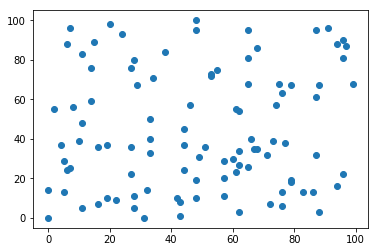

In [2]:
plt.scatter(coord_x, coord_y)

### Auxiliar functions

In [3]:
def euclidian(city_from, city_to):
    return np.sqrt((city_to[0]-city_from[0])**2 + (city_to[1]-city_from[1])**2)

In [4]:
mapCity = []
for city1 in cities:
    temp = []
    for city2 in cities:
        temp.append(euclidian(city1,city2))
    mapCity.append(temp)

In [5]:
def fitness_func(list_cities_enum, cities):
    sum_euclidian = 0
    aux_city = -1
    for i_city in list_cities_enum:
        if aux_city != -1:
            sum_euclidian += mapCity[aux_city][i_city]
            #sum_euclidian += euclidian(cities[aux_city],cities[i_city])
        aux_city = i_city
    return sum_euclidian

In [6]:
def create_random_paths(cities_e):
    paths = []
    
    for sel in range(0,amount_select):
        path =[i for i in range(len(cities_e))]
        shuffle(path) #function that randomize lists
        path.remove(0)
        path.insert(0,0)
        path.append(0)
        paths.append(path)
    return paths

In [7]:
def ride_roulette(selecteds):
    values = []
    #Montar Roleta
    #auxAccu = 0
    for path in selecteds:
        fitness = fitness_func(path,cities)
        #auxAccu += fitness
        values.append((path,fitness))
        #valuesAccu.append(auxAccu)

    # Calcular porcentagens
    calcPerc = lambda x: (1/x)/sum([1/val[1] for val in values])

    auxAccu = 0
    for i, path in enumerate(values):
        auxAccu += calcPerc(path[1])
        values[i] = path + (calcPerc(path[1]), auxAccu)
    return values

In [8]:
def spin_roulette(generation):
    rnd = random()
    choose = list(filter(lambda q: q[3] > rnd, generation))
    return min(choose,key=lambda x: x[3])

In [9]:
def mount_crossover(parent_one, parent_two, core_one, core_two, limits):
    i = limits[1]+1
    aux = limits[1]+1
    mount = []
    tail = []
    head = []
    
    #Monto o rabo
    while i < len(parent_one):
        while (parent_two[ aux % len(parent_one) ] in core_one):
            aux += 1
        tail.append(parent_two[ aux % len(parent_one) ])
        aux += 1
        i += 1
        
    #Monto o cabeça
    i = 0
    while i < limits[0]:
        while (parent_two[ aux % len(parent_one) ] in core_one):
            aux += 1
        head.append(parent_two[ aux % len(parent_one) ])
        aux += 1
        i += 1
    return head + core_one + tail

def crossover(parent_one, parent_two):
    
    #Choose the 2 borders randomly
    limits = sorted(sample(range(2,len(cities)-1),2))
    
    #Get only core of each
    core_one = [x for i, x in enumerate(parent_one) if i >= limits[0] and i <= limits[1]]
    core_two = [x for i, x in enumerate(parent_two) if i >= limits[0] and i <= limits[1]]
    
    mount_one = mount_crossover(parent_one,parent_two,core_one,core_two,limits)
    mount_two = mount_crossover(parent_two,parent_one,core_two,core_one,limits)
        
    return (mount_one, mount_two)

In [10]:
def mutation(child):
    for i in range(1,len(child)-1):
        if random() >= 0.95:
            pos = randrange(1, len(child)-1)
            aux = child[i]
            child[i] = child[pos]
            child[pos] = aux
    return child
            

In [20]:
def new_generate_second_method(selecteds):
    
    new_gen = sorted(selecteds, key=lambda x: fitness_func(x,cities))
    new_gen = new_gen[:len(new_gen)//2]
    new_child = []
    
    shuffle(new_gen)
    
    i = 0
    while i < len(new_gen):
        new_child_1, new_child_2 = crossover(new_gen[i], new_gen[i+1])
        new_child.append(new_child_1)
        new_child.append(new_child_2)
        
        mutation(new_gen[i])
        mutation(new_gen[i+1])
        mutation(new_child_1)
        mutation(new_child_2)
        i += 2
    
    new_li = new_gen + new_child
    
    return new_li

In [21]:
def create_new_generation(selecteds):
    i = 0
    new_generation = []
    while i < len(selecteds):
        parent_one = selecteds[i]
        parent_two = selecteds[i+1]
        
        child_one, child_two = crossover(parent_one, parent_two)
        
        #Mutante
        child_one = mutation(child_one)
        child_two = mutation(child_two)
        
        new_generation.append(child_one)
        new_generation.append(child_two)
        
        i += 2
        
    return new_generation

### População

In [22]:
population = create_random_paths(cities)
history_fitness_func = []

for i in range(0, 1000):
    roulette = ride_roulette(population)
    new_selects = [spin_roulette(roulette)[0] for i in range(0, amount_select)]
    #population = create_new_generation(new_selects)
    population = new_generate_second_method(population)
    t = fitness_func(min(population, key=lambda x: fitness_func(x,cities)),cities)
    history_fitness_func.append(t)
    #print(t)
    

In [23]:
fitness_func(min(population, key=lambda x: fitness_func(x,cities)),cities)

4267.029895595023

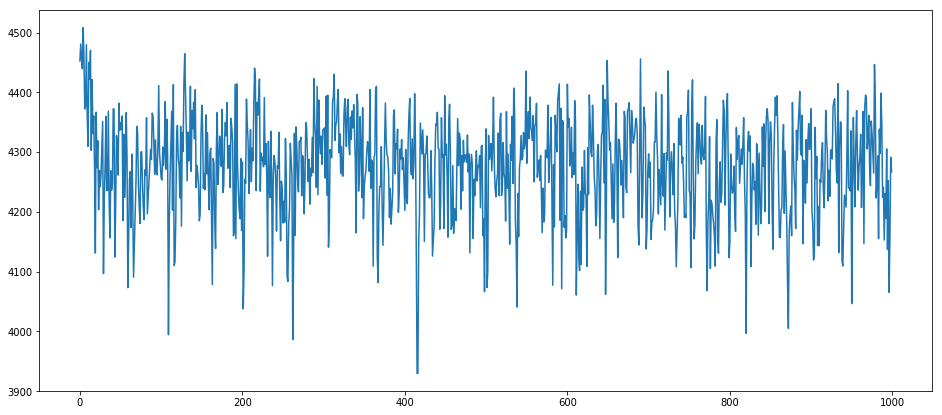

In [24]:
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(history_fitness_func)

In [25]:
history_fitness_func

[4452.339055405856,
 4480.944636599777,
 4456.383480964137,
 4439.422805874261,
 4508.30806277652,
 4457.959230733362,
 4372.0677935953745,
 4377.905880184254,
 4479.76845554741,
 4360.496670355527,
 4309.601695963762,
 4450.134530126778,
 4421.631637470319,
 4469.9677614677075,
 4303.147676224635,
 4421.277314537805,
 4330.8847198267395,
 4360.35626504925,
 4276.308314109677,
 4131.083666050773,
 4366.842233230579,
 4273.887607780044,
 4318.926815778559,
 4203.484990526194,
 4269.19894084796,
 4241.803503978233,
 4263.529660667864,
 4304.8619112676115,
 4351.178737186126,
 4096.628436564794,
 4222.80001005697,
 4275.83718579216,
 4359.733945967617,
 4236.111294491668,
 4235.557582370303,
 4368.184751636017,
 4215.781180532811,
 4156.364646388713,
 4268.645547333624,
 4236.239169530833,
 4246.390490043894,
 4372.45496207045,
 4371.847512955138,
 4124.260576463491,
 4206.9999618286865,
 4327.677648861221,
 4312.986048853217,
 4261.463879148451,
 4381.782952435467,
 4335.988860602529,
 4

In [17]:
crossover([1,3,2,6,4,5,9,7,8],[3,7,8,1,4,9,2,5,6])

([6,
  3,
  7,
  8,
  1,
  4,
  9,
  2,
  5,
  6,
  3,
  7,
  8,
  1,
  4,
  9,
  2,
  5,
  6,
  3,
  7,
  8,
  1,
  4,
  9,
  2,
  5,
  6,
  3,
  7,
  8,
  1],
 [8,
  1,
  3,
  2,
  6,
  4,
  5,
  9,
  7,
  8,
  1,
  3,
  2,
  6,
  4,
  5,
  9,
  7,
  8,
  1,
  3,
  2,
  6,
  4,
  5,
  9,
  7,
  8,
  1,
  3,
  2,
  6])

In [18]:
len([1,2,3])

3

In [19]:
4 % 7

4